                  s  exposure  isolation        km
s          1.000000 -0.441510  -0.464870  0.812988
exposure  -0.441510  1.000000   0.095818 -0.434990
isolation -0.464870  0.095818   1.000000 -0.567555
km         0.812988 -0.434990  -0.567555  1.000000


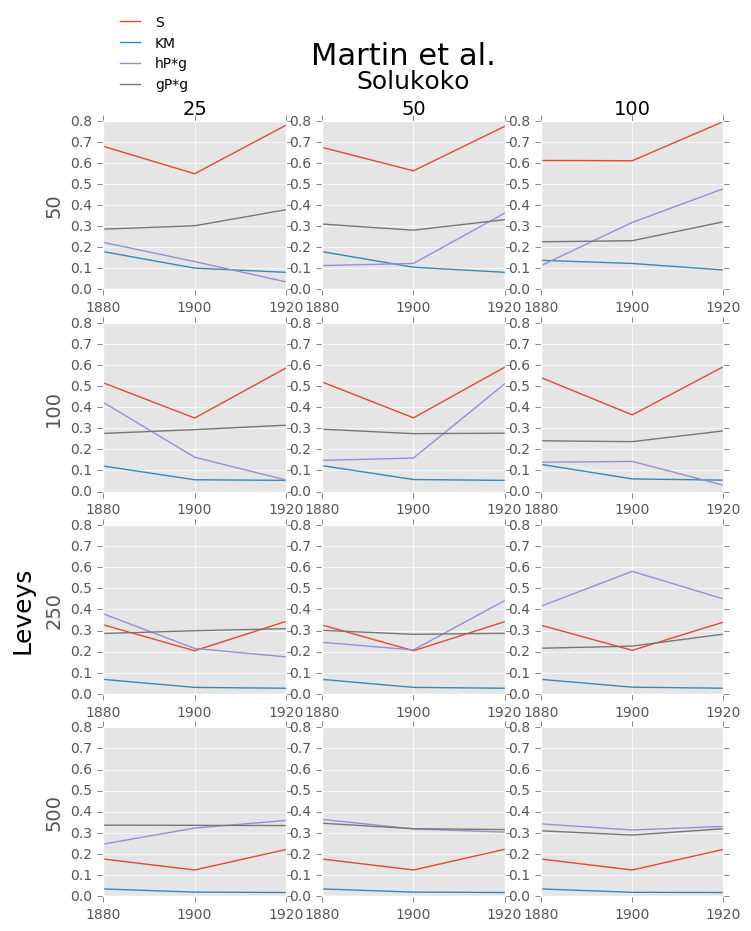

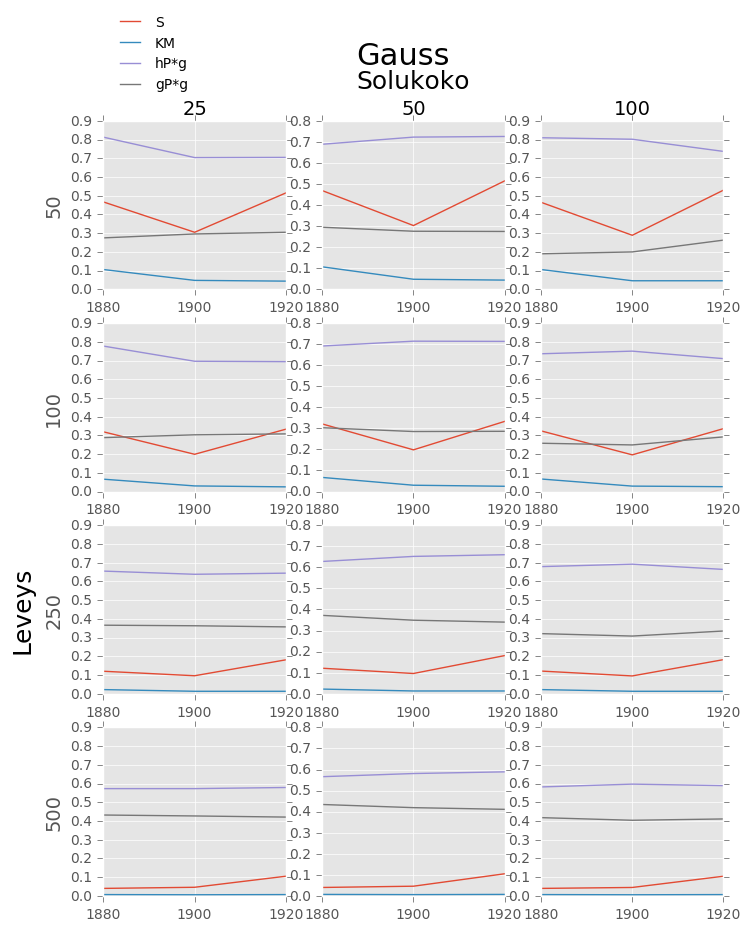

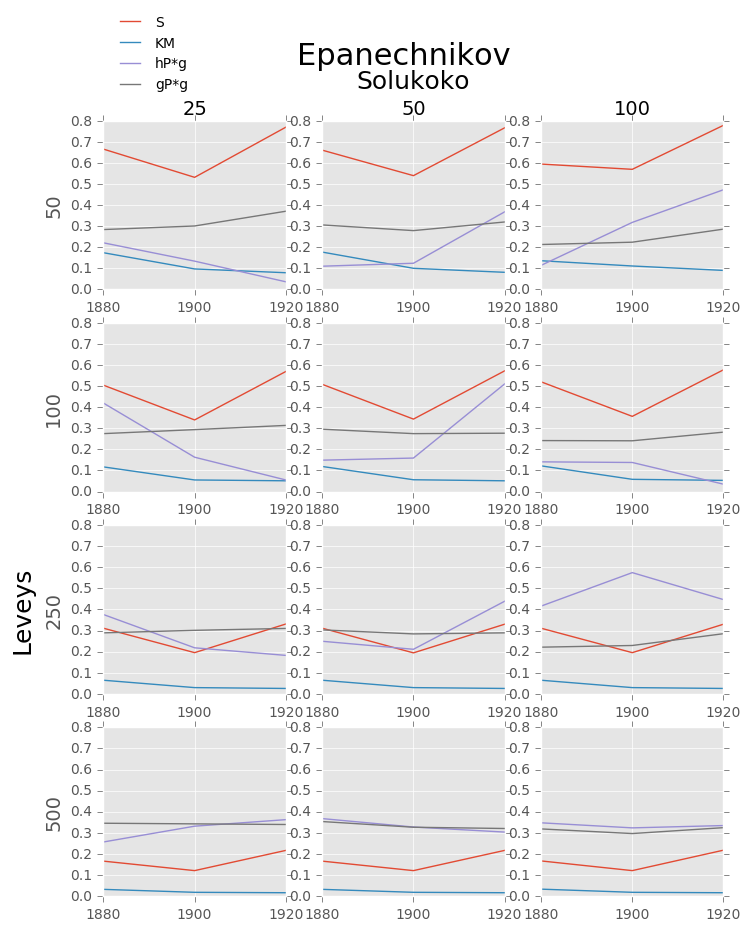

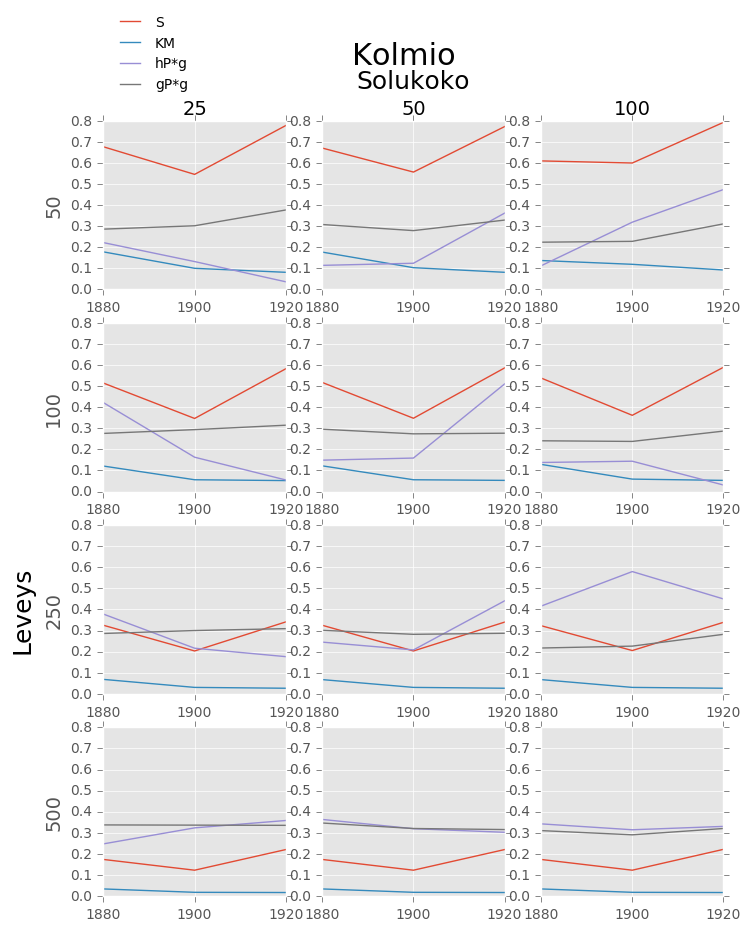

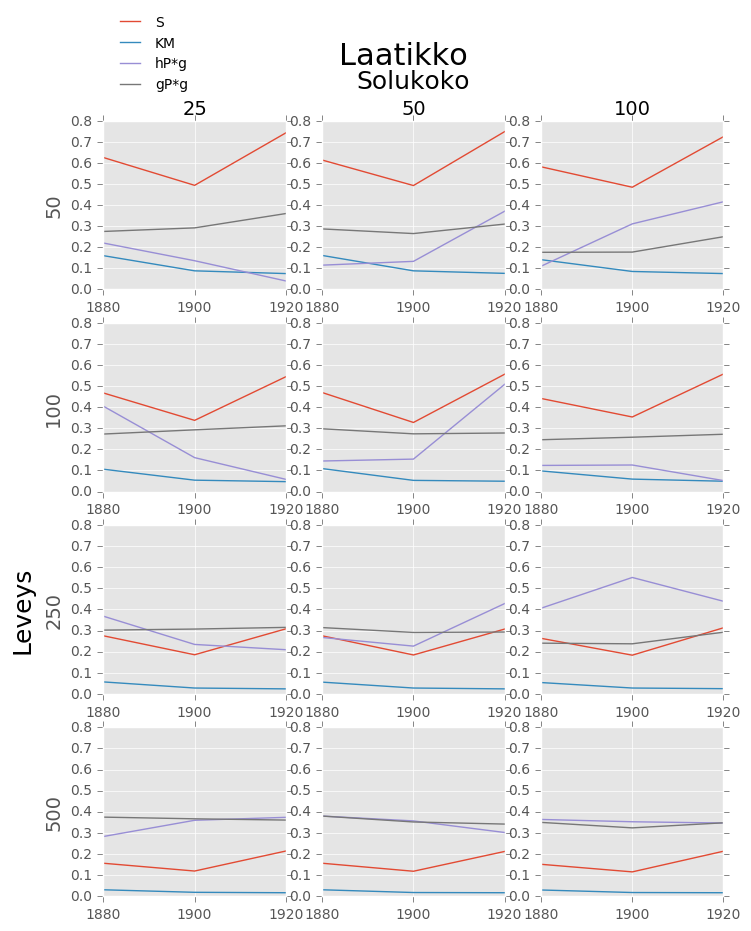

In [1]:
import io
import json

import requests
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from statsmodels.sandbox.tools.tools_pca import pca

from spatial_segregation import data, kde, analyses, plotting

DATA_DIR = 'https://raw.githubusercontent.com/AnttiHaerkoenen/spatial_segregation/master/data'


def get_text(file, data_dir=DATA_DIR):
    url = '{0}/{1}'.format(data_dir, file)
    s = requests.get(url).content
    text_io = io.StringIO(s.decode('utf-8'))
    return text_io

# point_data = json.loads(get_text('points1878.geojson').getvalue())
# 
# v80 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1880.csv'))))
# v00 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1900.csv'))))
# v20 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1920.csv'))))
# 
# pop_data = {
#     '1880': v80,
#     '1900': v00,
#     '1920': v20
# }   
# 
# cells = [i for i in range(20, 81, 20)]
# bandwidths = [i for i in range(50, 501, 150)]
# 
# data = {year: data.add_coordinates(value, point_data, coordinates_to_meters=False)
#         for year, value in pop_data.items()}
# 
# ana1 = analyses.SegregationSurfaceAnalyses(
#     data_dict=data,
#     cell_sizes=cells,
#     kernels=[k for k in kde.KERNELS],
#     bws=bandwidths
# )
# ana1.analyse()
# print(ana1.results)
# ana1.results.plot()
# plt.show()
# 
# ana2 = analyses.SegregationIndexAnalyses(
#     data_dict=data,
#     cell_sizes=cells,
#     kernels=[k for k in kde.KERNELS],
#     bws=bandwidths
# )
# ana2.analyse()
# print(ana2.results)
# ana2.results.plot()
# plt.show()
# 
# results = pd.merge(ana1.results, ana2.results)

##################################################################################################

results = pd.read_csv(get_text('kaikki.csv'), index_col=0)
plt.style.use("ggplot")

# ytimet = ["Martin et al.", "Gaussian", "Epanechnikov", "Triangle", "Uniform"]
# for i, index in enumerate("distance_decay gaussian epanechnikov triangle uniform".split()):
#     plotting.plot_results_all(
#         results,
#         index,
#         indices="s km exposure isolation".split(),
#         title=ytimet[i],
#         subplot_title_param=dict(bandwidth='bandwidth', cell_size='cell size'),
#         labels="S KM hP*g gP*g".split()
#     )

ytimet = ["Martin et al.", "Gauss", "Epanechnikov", "Kolmio", "Laatikko"]
for i, index in enumerate("distance_decay gaussian epanechnikov triangle uniform".split()):
    plotting.plot_results_all(
        results,
        index,
        indices="s km exposure isolation".split(),
        title=ytimet[i],
        subplot_title_param=dict(bandwidth='leveys', cell_size='solukoko'),
        labels="S KM hP*g gP*g".split()
    )

print(results["s exposure isolation km".split()].corr('spearman'))
scatter_matrix(results["s exposure isolation km".split()], diagonal='kde', figsize=(10, 8))
plt.suptitle('Scattermatrix of correlations')
plt.show()

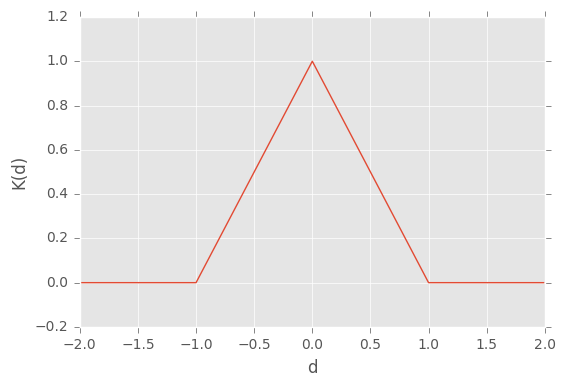

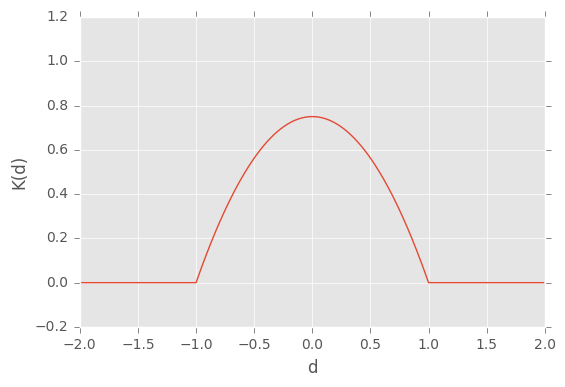

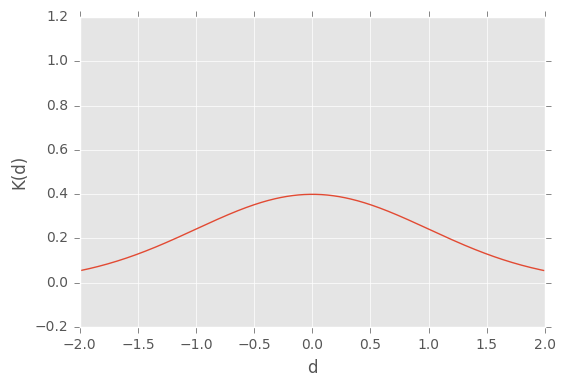

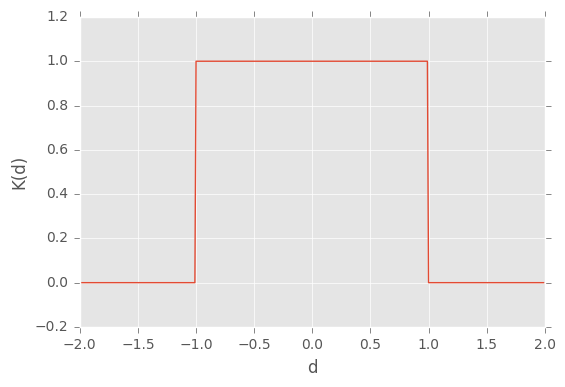

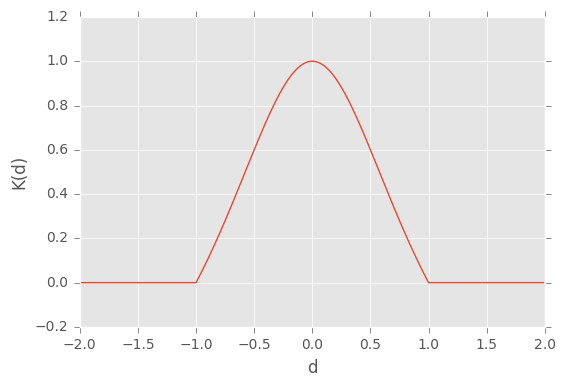

In [2]:
import matplotlib.pyplot as plt

from spatial_segregation import plotting, kde

for k, f in kde.KERNELS.items():
    plotting.plot_kernel(f)
    # plt.title(k.capitalize())
    plt.ylim((-0.2, 1.2))
    plt.ylabel("K(d)")
    plt.xlabel("d")
    plt.show()